In [3]:
from PIL import Image
from inference import Predictor
import pathlib
import cv2 
import numpy as np
from tqdm import  tqdm
import matplotlib.pyplot as plt
# Load the autoreload extension
%load_ext autoreload
import pandas as pd
# Set autoreload to automatically reload modules
%autoreload 2

In [4]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert to HSV color space
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)  # Increase the brightness by adding a value to V channel
    v = cv2.min(v, 255)    # Ensure pixel values don't exceed 255
    hsv = cv2.merge((h, s, v))
    img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img_bright

CELEBRITY_LABELS = {'female': 0, 'male': 1}
i = 0

def gen_img(src_p, ref_p, label, show=True, result_p=None):
    predictor = Predictor(entity="celebrity")
    src = Image.open(src_p).convert("RGB")
    ref = Image.open(ref_p).convert("RGB")
    if result_p is None:
        result_p = f"images/res/{src_p.split('/')[-1]}_{ref_p.split('/')[-1]}.jpg"
    result_p = pathlib.Path(result_p)
    res_img = predictor.create_interpolation(label, src_image=src, ref_image=ref, res_p=result_p)

    if show:
        src = cv2.imread(src_p)
        ref = cv2.imread(ref_p)
        res = cv2.imread(str(result_p))
        newsrc_width = int((src.shape[1]*256)/src.shape[0])
        newref_width = int((ref.shape[1]*256)/ref.shape[0])
        src_resized = cv2.resize(src, (newsrc_width, 256))
        ref_resized = cv2.resize(ref, (newref_width, 256))
        # res_resized = res[0].transpose(1, 2, 0)
        image1_rgb = cv2.cvtColor(src_resized, cv2.COLOR_BGR2RGB)
        image2_rgb = cv2.cvtColor(ref_resized, cv2.COLOR_BGR2RGB)
        res_resized = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

        # res_resized = increase_brightness(res_resized, value=0)

        # Create a figure with 1 row and 3 columns
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

        # Plot each image in a different subplot
        axes[0].imshow(image1_rgb)
        axes[0].axis('off')  
        axes[1].imshow(image2_rgb)
        axes[1].axis('off')  
        axes[2].imshow(res_resized)
        axes[2].axis('off')  
        # plt.savefig('res/output_plot.png', bbox_inches='tight')  # You can change the filename and format as needed
        # i += 1
        plt.show()

        # cv2.imwrite(, combined_image)
    return result_p



/home/user/.local/lib/python3.8/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


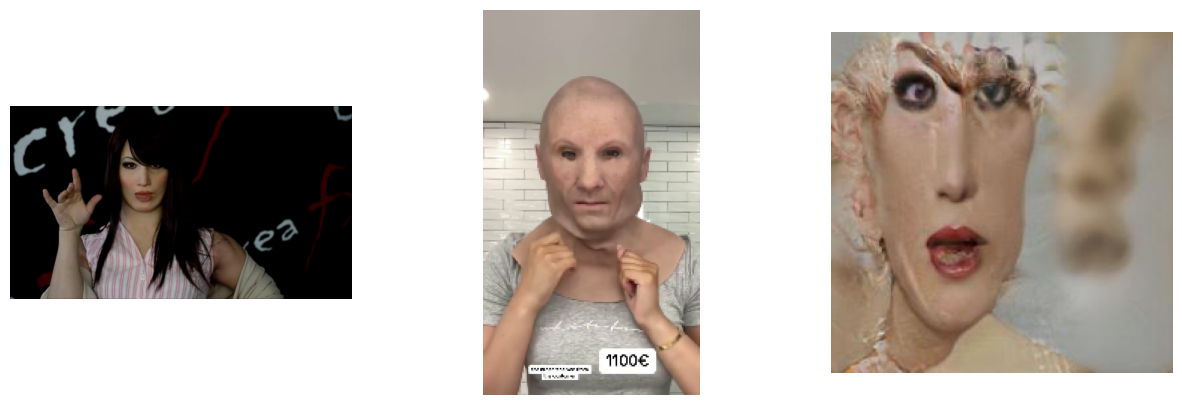

PosixPath('images/res/2.jpg_3.jpg.jpg')

In [5]:
src_p = './images/mask2/f/2.jpg'
ref_p = './images/mask2/m/3.jpg'
label = "female"
gen_img(src_p, ref_p, label)

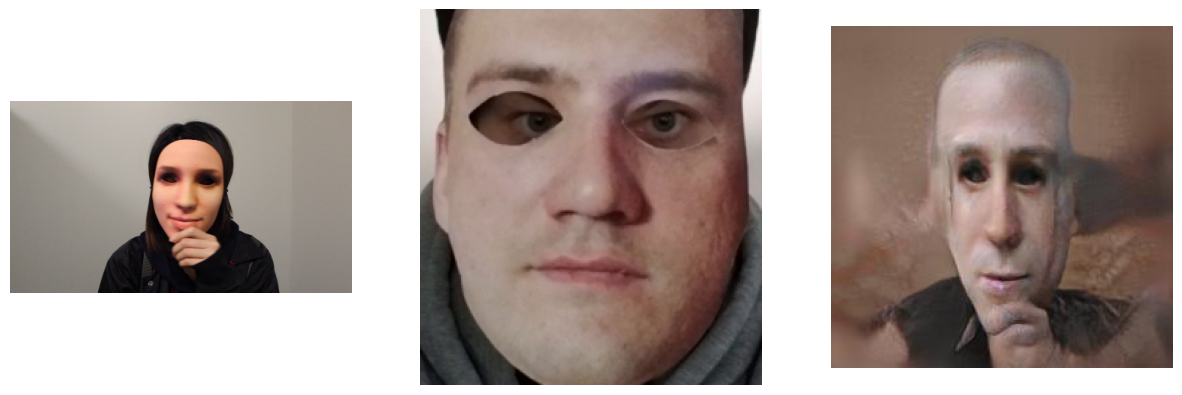

PosixPath('images/res/2.jpg_3.png.jpg')

In [6]:
src_p = './images/mask1/f/2.jpg'
ref_p = './images/mask1/m/3.png'
label = "male"
gen_img(src_p, ref_p, label)

## DATA Preparation for synthesis

# M1

In [43]:
df1 = pd.read_csv("data/m1_masks.csv")
df1['img_basename'] = df1[df1.columns[0]].apply(lambda x: os.path.basename(x))
df1

,FPath,Subject,Dataset,img_basename
0,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frame#_541_CFX Sin of Pride (Djinn variant) Si...
1,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_90_IMG_3730.jpg
2,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_10_IMG_6222.jpg
3,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-AdultDoll_000071_005987.jpg
4,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-AdultDoll_000071_005624.jpg
...,...,...,...,...
18162,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,2dmask_173_03.png
18163,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,images - 2023-09-26T155037.213.jpg
18164,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_175_IMG_2320.jpg
18165,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-GarageKit_001137_000001.jpg


In [35]:
import os
import pandas as pd
df = pd.read_csv('data/full_mask_detection_dataset.csv')
df = df[df['label']==0]
# df = df.rename(columns={'image_name': 'FPath'})
# df = pd.read_csv('data/completed_test.csv')
df['img_basename'] = df['image_name'].apply(lambda x: os.path.basename(x))
# df[df['label']==1].groupby(['dataset']).count()
df


,image_name,subject,dataset,label,img_basename
51890,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,1,2D_mask,0,frameNr_100_outline_1.mp4.MOV.jpg
51891,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,1,2D_mask,0,frameNr_10_outline_1.mp4.MOV.jpg
51892,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,10,2D_mask,0,frameNr_10_outline_10.mp4.jpg
51893,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,11,2D_mask,0,frameNr_10_outline_11.mp4.jpg
51894,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,12,2D_mask,0,frameNr_10_outline_12.mp4.jpg
...,...,...,...,...,...
72335,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_6583,silicon_mask_biometric,0,frameNr_75_IMG_6583.jpg
72336,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_6583,silicon_mask_biometric,0,frameNr_80_IMG_6583.jpg
72337,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_6583,silicon_mask_biometric,0,frameNr_90_IMG_6583.jpg
72338,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_6583,silicon_mask_biometric,0,frameNr_95_IMG_6583.jpg


In [45]:
test_data = pd.merge(df1, df, on=['img_basename'], how='left')
# test_data = pd.merge(test_data, test_data2, on=['fname'], how='outer')
test_data = test_data.drop(columns=['label_y', 'image_name'])
# test_data = test_data.rename(columns={"label_x":"label"})
test_data

,FPath,Subject,Dataset,img_basename,image_name,subject,dataset,label
0,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frame#_541_CFX Sin of Pride (Djinn variant) Si...,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,111111111,youtube_google,0
1,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_90_IMG_3730.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_3730,silicon_mask_biometric,0
2,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_10_IMG_6222.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_6222,silicon_mask_biometric,0
3,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-AdultDoll_000071_005987.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,000071,3D-AdultDoll,0
4,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-AdultDoll_000071_005624.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,000071,3D-AdultDoll,0
...,...,...,...,...,...,...,...,...
18162,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,2dmask_173_03.png,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,173,2dmask,0
18163,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,images - 2023-09-26T155037.213.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,111111111,youtube_google,0
18164,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,frameNr_175_IMG_2320.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,IMG_2320,silicon_mask_biometric,0
18165,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train,3D-GarageKit_001137_000001.jpg,/mnt/22TB/Nurmukhammed/SILICON_MASKS_DATASETS/...,001137,3D-GarageKit,0


In [ ]:
test_data = pd.merge(test_data, df, on=['img_basename'], how='left')
# test_data = pd.merge(test_data, test_data2, on=['fname'], how='outer')
test_data = test_data.drop(columns=['label_y', 'image_name'])
test_data = test_data.rename(columns={"label_x":"label"})
test_data

In [ ]:
dpath = './data/tra/test_list11.csv'
# dpath = '/mnt/8TB/ml_projects_yeldar/patchnet/train/train_list.csv'
# test_data2 = pd.read_csv(dpath)
test_data = pd.read_csv(dpath)
test_data.columns = ['fname', 'label']
test_data['img_basename'] = test_data['fname'].apply(lambda x: os.path.basename(x))
test_data['score'] = val_scores
test_data

# M4

In [25]:
import os
import csv
from PIL import Image

def contains_any(text, strings):
    return any(substring in text for substring in strings)

def check_M4(folderName):

    strings_to_check = ["Mask_Mann", "Mask_Half", "Mask_Paper", "Mask_Trans", "Partial_Mouth", "Partial_Paperglass", "Mask_Silicone"]

    if contains_any(folderName, strings_to_check):
        return True
    
    return False


def choose_max_area_imageM4(folder_path):
    # List to hold the selected image paths and subfolder names
    selected_images = []
    
    # Loop through each subfolder in the given folder
    for subfolder_name in os.listdir(folder_path):

        if not check_M4(subfolder_name):
            continue
        subfolder_path = os.path.join(folder_path, subfolder_name)
        
        # Check if it is a directory
        if os.path.isdir(subfolder_path):
            max_area = 0
            max_area_image_path = None
            
            # Loop through all files in the subfolder
            for file_name in os.listdir(subfolder_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    file_path = os.path.join(subfolder_path, file_name)
                    
                    try:
                        # Open the image to calculate its area
                        with Image.open(file_path) as img:
                            width, height = img.size
                            area = width * height
                            
                            # Check if this image has the maximum area
                            if area > max_area:
                                max_area = area
                                max_area_image_path = file_path
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
            
            # If an image was found in the subfolder, store its path and subfolder name
            if max_area_image_path:
                mask_type = "_".join(subfolder_name.split('_')[:-1])
                selected_images.append((max_area_image_path, subfolder_name, mask_type))
    
    return selected_images


def choose_max_area_image(folder_path):
    # List to hold the selected image paths and subfolder names
    selected_images = []
    
    # Loop through each subfolder in the given folder
    for subfolder_name in os.listdir(folder_path):

        subfolder_path = os.path.join(folder_path, subfolder_name)
        
        # Check if it is a directory
        if os.path.isdir(subfolder_path):
            max_area = 0
            max_area_image_path = None
            
            # Loop through all files in the subfolder
            for file_name in os.listdir(subfolder_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    file_path = os.path.join(subfolder_path, file_name)
                    
                    try:
                        # Open the image to calculate its area
                        with Image.open(file_path) as img:
                            width, height = img.size
                            area = width * height
                            
                            # Check if this image has the maximum area
                            if area > max_area:
                                max_area = area
                                max_area_image_path = file_path
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
            
            # If an image was found in the subfolder, store its path and subfolder name
            if max_area_image_path:
                mask_type = None
                selected_images.append((max_area_image_path, subfolder_name, mask_type))
    
    return selected_images

def save_to_csv(data, output_csv):
    # Save the selected image paths and subfolder names to a CSV file
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Path', 'Subfolder Name', "mask_type"])  # Header row
        writer.writerows(data)  # Data rows

In [26]:
# Usage
folder_path = "/media/user/685b3289-4051-4530-9827-ef770d2e3f28/ml_projects_yeldar/sil_mask_youtube_after_corr"  # Replace with the path to your folder
output_csv = 'data/youtube_masks.csv'    # Output CSV file name

# Get the result and save to CSV
result = choose_max_area_image(folder_path)
save_to_csv(result, output_csv)

print(f"Results saved to {output_csv}")

Results saved to data/youtube_masks.csv


In [15]:
df1 = pd.read_csv("/home/user/ml_projects/Yeldar/SSAN/data/tra/retina_SiwMv2.csv")
df1 = df1[df1['label']==0]
df1 = df1[~df1['fname'].str.contains("Exclude/")]
df1


,label,fname
10810,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
10811,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
10812,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
10813,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
10814,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
...,...,...
22677,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
22678,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
22679,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...
22680,0,/mnt/22TB/Nurmukhammed/CROPPED_FAS_DATASETS/RE...


In [36]:
df1 = pd.read_csv("data/m1_masks.csv")
df2 = pd.read_csv("data/m4_masks.csv")
df3 = pd.read_csv("data/tiktok_masks.csv")
df4 = pd.read_csv("data/youtube_masks.csv")
all_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# df1.to_csv(output_csv, index=False)
all_df

,FPath,Subject,Dataset
0,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train
1,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train
2,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train
3,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train
4,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,NaN,M1_train
...,...,...,...
19932,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,mask_video_754,sil_mask_youtube_after_corr
19933,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,mask_video_154,sil_mask_youtube_after_corr
19934,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,mask_video_2,sil_mask_youtube_after_corr
19935,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,mask_video_621,sil_mask_youtube_after_corr


In [37]:
all_df.to_csv("data/all_masks.csv", index=False)


# MASKS Synthesis

In [30]:
import random
import os
from collections import defaultdict, Counter
from itertools import combinations

def generate_pairs(files, n):
    if len(files) < 2:
        raise ValueError("At least two files are needed to create pairs.")
    
    # Dictionary to track how many times each file is used
    file_usage = defaultdict(int)
    
    # List to hold the generated pairs
    pairs = []
    
    # Keep generating pairs until we have n pairs
    while len(pairs) < n:
        # Shuffle the files to ensure randomness
        random.shuffle(files)
        
        # Try to create a pair from the least used files
        for i in range(0, len(files) - 1, 2):
            file1, file2 = files[i], files[i + 1]
            
            # Only add the pair if both files are used the least number of times
            if file_usage[file1] == min(file_usage.values()) and file_usage[file2] == min(file_usage.values()):
                pairs.append((file1, file2))
                file_usage[file1] += 1
                file_usage[file2] += 1
                
                # Stop if we've reached the required number of pairs
                if len(pairs) == n:
                    break
    
    return pairs


def generate_unique_pairs(int_list, csv_path):
    # Read existing pairs from CSV if the file exists
    try:
        existing_pairs_df = pd.read_csv(csv_path, header=None)
        existing_pairs = set(tuple(row) for row in existing_pairs_df.values)
    except FileNotFoundError:
        existing_pairs = set()

    # Generate all possible unique pairs (i, j) with i < j
    all_pairs = [(min(i, j), max(i, j)) for i, j in combinations(int_list, 2)]

    # Filter out pairs that already exist in the CSV
    new_pairs = [pair for pair in all_pairs if pair not in existing_pairs]

    # Save new pairs to the CSV to avoid future duplication
    pd.DataFrame(new_pairs).to_csv(csv_path, mode='a', index=False, header=False)

    return new_pairs


def total_gen(df, 
    chunks = 10,
    total = 1000,
    res_csv = "data/m4_synthesized_masks.csv",
    res_path = "/media/user/685b3289-4051-4530-9827-ef770d2e3f28/ml_projects_yeldar/MaskSynthez/exp2"):
    srcs = []
    refs = []
    ress = []
    labels = []
    resulting_pairs = None
    for i in tqdm(range(total)):
        current = i % chunks
        if current == 0:
            resulting_pairs = generate_unique_pairs(range(len(df)), n=chunks, res_csv)
        pair = resulting_pairs[current]
        label = "male" if random.randint(0, 1) == 0 else "female"
        gen_path = gen_img(pair[0], pair[1], label, show=False, result_p=os.path.join(res_path, f"{i}.jpg"))

        srcs.append(pair[0])
        refs.append(pair[1])
        ress.append(gen_path)
        labels.append(label)

        if (i % 200 == 0):     
            df_tmp = pd.DataFrame({"src_path":srcs, "ref_path":refs, "gen_path":ress, "gen_label":labels})

            try:
                df_all = pd.read_csv(res_csv)
            except:
                df_all = pd.DataFrame({"src_path":[], "ref_path":[], "gen_path":[], "gen_label":[]})

            df_all = pd.concat([df_all, df_tmp], ignore_index=True)
            df_all.to_csv(res_csv, index=False)
            del df_all
            del df_tmp
            srcs = []
            refs = []
            ress = []
            labels = []

        df_tmp = pd.DataFrame({"src_path":srcs, "ref_path":refs, "gen_path":ress, "gen_label":labels})

        try:
            df_all = pd.read_csv(res_csv)
        except:
            df_all = pd.DataFrame({"src_path":[], "ref_path":[], "gen_path":[], "gen_label":[]})

        df_all = pd.concat([df_all, df_tmp], ignore_index=True)
        df_all.to_csv(res_csv, index=False)
        del df_all
        del df_tmp
        srcs = []
        refs = []
        ress = []
        labels = []

        i += 1



In [52]:
all_df = pd.read_csv("data/m4_masks.csv")


  0%|          | 0/100000 [04:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
all_df = pd.read_csv("data/m4_masks.csv")

chunks = 100
total = 10000
res_csv = "data/m4_synthesized_masks.csv"
res_path = "/media/user/685b3289-4051-4530-9827-ef770d2e3f28/ml_projects_yeldar/MaskSynthez/exp2"
srcs = []
refs = []
ress = []
labels = []
resulting_pairs = None
for i in tqdm(range(total)):
    current = i % chunks
    if current == 0:
        resulting_pairs = generate_unique_pairs(all_df, 'used_pairs.csv', n=chunks)
    pair = resulting_pairs[current]
    label = "male" if random.randint(0, 1) == 0 else "female"
    gen_path = gen_img(pair[0], pair[1], label, show=False, result_p=os.path.join(res_path, f"{i}.jpg"))

    srcs.append(pair[0])
    refs.append(pair[1])
    ress.append(gen_path)
    labels.append(label)

    if (i % 200 == 0):     
        df_tmp = pd.DataFrame({"src_path":srcs, "ref_path":refs, "gen_path":ress, "gen_label":labels})

        try:
            df_all = pd.read_csv(res_csv)
        except:
            df_all = pd.DataFrame({"src_path":[], "ref_path":[], "gen_path":[], "gen_label":[]})

        df_all = pd.concat([df_all, df_tmp], ignore_index=True)
        df_all.to_csv(res_csv, index=False)
        del df_all
        del df_tmp
        srcs = []
        refs = []
        ress = []
        labels = []

    df_tmp = pd.DataFrame({"src_path":srcs, "ref_path":refs, "gen_path":ress, "gen_label":labels})

    try:
        df_all = pd.read_csv(res_csv)
    except:
        df_all = pd.DataFrame({"src_path":[], "ref_path":[], "gen_path":[], "gen_label":[]})

    df_all = pd.concat([df_all, df_tmp], ignore_index=True)
    df_all.to_csv(res_csv, index=False)
    del df_all
    del df_tmp
    srcs = []
    refs = []
    ress = []
    labels = []

    i += 1


In [31]:
df = pd.read_csv("data/synthesized_masks_exp1.csv")
# df.index = range(1, len(df) + 1)
df

,src_path,ref_path,gen_path,gen_label
0,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
1,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
2,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
3,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
4,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
...,...,...,...,...
8668,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
8669,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
8670,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
8671,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male


In [29]:
df.iloc[157]

Image Path        /media/user/685b3289-4051-4530-9827-ef770d2e3f...
Subfolder Name                                         Mask_Half_32
mask_type                                                 Mask_Half
Name: 158, dtype: object

In [16]:
a = generate_pairs2(df, n=10)
a

TypeError: unhashable type: 'Index'

In [48]:
df = pd.read_csv("./data/synthesized_masks_exp1.csv")
df

,src_path,ref_path,gen_path,gen_label
0,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
1,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
2,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
3,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
4,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
...,...,...,...,...
8668,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,female
8669,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
8670,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male
8671,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,/media/user/685b3289-4051-4530-9827-ef770d2e3f...,male


In [ ]:

test api ssan, test also main endpoint (test only spoofs)

GAN:
-1) check how much found by facedetectors = 0.4% (356/8K)


0) divide m1, cut it, extract classes - not done
1) max face area - added
2) save divided by folders - will do it manually
3) label gender make 50/50 - not added



21.10
0) face similarity 
1) save face detector results to folders
2) finish 

28.10
0) choose 5 imgs with local ONNX scores. Send to Ars